<a href="https://colab.research.google.com/github/atharva2-0x/Calci_ts/blob/main/Fiserv_big4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [34]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [ ]:
data = np.genfromtxt('tranxData.csv', delimiter=',', dtype=str)

In [36]:
# Convert dataset to pandas DataFrame
df = pd.DataFrame(data[1:], columns=data[0])

In [38]:
df


,Date,Day,Time,TransactionID,CustomerID,Item,Category,Amount,PaymentMethod
0,1/1/2024,Monday,9:15,TXN10001,CUST001,Latte,Beverage,5,Credit Card
1,1/1/2024,Monday,9:30,TXN10002,CUST002,Americano,Beverage,4.5,Mobile Payment
2,1/1/2024,Monday,9:45,TXN10003,CUST003,Turkey Sandwich,Food,7,Credit Card
3,1/1/2024,Monday,10:00,TXN10004,CUST004,Blueberry Muffin,Pastry,3,Cash
4,1/1/2024,Monday,12:15,TXN10005,CUST005,Espresso,Beverage,3,Credit Card
...,...,...,...,...,...,...,...,...,...
247,1/7/2024,Sunday,15:00,TXN10257,CUST032,Blueberry Muffin,Pastry,3,Credit Card
248,1/7/2024,Sunday,15:10,TXN10258,CUST033,Iced Tea,Beverage,3.5,Mobile Payment
249,1/7/2024,Sunday,19:20,TXN10269,CUST008,Latte,Beverage,5,Mobile Payment
250,1/7/2024,Sunday,15:30,TXN10260,CUST035,Latte,Beverage,5,Cash


In [39]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 252 entries, 0 to 251
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Date           252 non-null    object
 1   Day            252 non-null    object
 2   Time           252 non-null    object
 3   TransactionID  252 non-null    object
 4   CustomerID     252 non-null    object
 5   Item           252 non-null    object
 6   Category       252 non-null    object
 7   Amount         252 non-null    object
 8   PaymentMethod  252 non-null    object
dtypes: object(9)
memory usage: 17.8+ KB


In [43]:
#checking the null values of the data set
df.duplicated()

,0
0,False
1,False
2,False
3,False
4,False
...,...
247,False
248,False
249,False
250,False


In [ ]:
# Convert Time column to datetime format
df['Time'] = pd.to_datetime(df['Time'], format='%H:%M')

# Define time slots
time_slots = ["9am-1pm", "1pm-5pm", "5pm-9pm"]

In [ ]:
# Initialize dictionary to hold transaction counts for each day and time slot
transaction_counts = {day: [0, 0, 0] for day in df['Day'].unique()}


In [ ]:

# Calculate number of transactions within each time slot for each day
for day in df['Day'].unique():
    df_day = df[df['Day'] == day]
    for i, time_slot in enumerate(time_slots):
        start_time = pd.to_datetime(time_slot.split('-')[0], format='%I%p').time()
        end_time = pd.to_datetime(time_slot.split('-')[1], format='%I%p').time()
        transaction_counts[day][i] = df_day.loc[(df_day['Time'].dt.time >= start_time) & (df_day['Time'].dt.time < end_time)].shape[0]


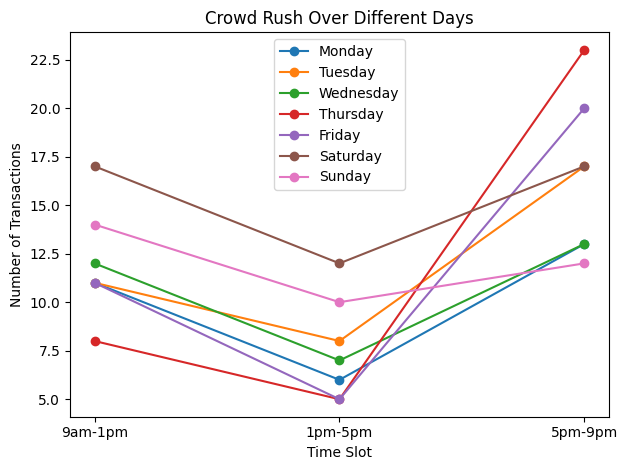

In [24]:

# Plot the line graph for each day
for day in transaction_counts.keys():
    plt.plot(time_slots, transaction_counts[day], marker='o', label=day)

plt.xlabel('Time Slot')
plt.ylabel('Number of Transactions')
plt.title('Crowd Rush Over Different Days')
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()


In [ ]:
df['TypeOfDay'] = df['Day'].apply(lambda x: 'Weekday' if x in ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday'] else 'Weekend')


# Define time slots
time_slots = ["9am-1pm", "1pm-5pm", "5pm-9pm"]

# Initialize dictionaries to hold transaction counts for weekdays and weekends
transaction_counts_weekday = {slot: 0 for slot in time_slots}
transaction_counts_weekend = {slot: 0 for slot in time_slots}

# Calculate number of transactions within each time slot for weekdays and weekends
weekday_count = df[df['TypeOfDay'] == 'Weekday']['Day'].nunique()
weekend_count = df[df['TypeOfDay'] == 'Weekend']['Day'].nunique()

In [ ]:
for time_slot in time_slots:
    start_time = pd.to_datetime(time_slot.split('-')[0], format='%I%p').time()
    end_time = pd.to_datetime(time_slot.split('-')[1], format='%I%p').time()

    # The .dt accessor is no longer needed as the 'Time' column already contains datetime.time objects
    weekday_transactions = df.loc[(df['TypeOfDay'] == 'Weekday') &
                                  (df['Time'] >= start_time) &
                                  (df['Time'] < end_time)].shape[0]
    weekend_transactions = df.loc[(df['TypeOfDay'] == 'Weekend') &
                                  (df['Time'] >= start_time) &
                                  (df['Time'] < end_time)].shape[0]

    transaction_counts_weekday[time_slot] = weekday_transactions / weekday_count
    transaction_counts_weekend[time_slot] = weekend_transactions / weekend_count

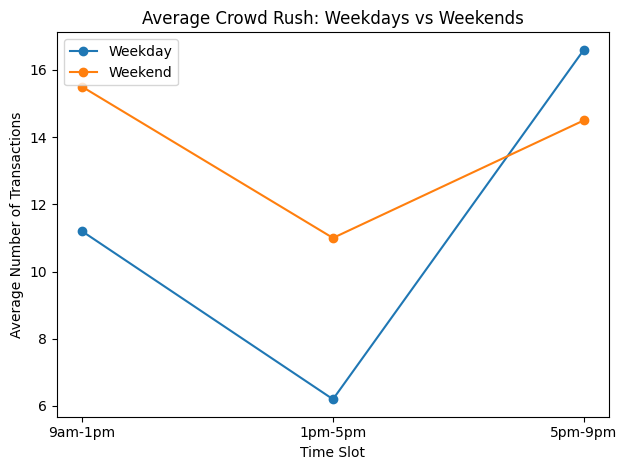

In [46]:
# Plot the line graph
plt.plot(time_slots, list(transaction_counts_weekday.values()), marker='o', label='Weekday')
plt.plot(time_slots, list(transaction_counts_weekend.values()), marker='o', label='Weekend')

plt.xlabel('Time Slot')
plt.ylabel('Average Number of Transactions')
plt.title('Average Crowd Rush: Weekdays vs Weekends')
plt.legend()
plt.tight_layout()

# Display the graph
plt.show()